# a playground to learn how to extract the axial mass from the measured events (after event selection cuts)

In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0, '../mupClassification/');  sys.path.insert(0, '../off_beam_on_beam_5e19/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/HowToExtractTheAxialMass/Figures/AxialMassPlayground/'

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


In [4]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
non-collinearity first,90.4%,45.3%,94.8%,15.4%,"$|\theta_{1,2}-90^0|<60^0$",90.4% (3446),42.7% (1707),10.9% (2462),94.8% (1170)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
Pt no Delta phi,24.7%,88.7%,46.1%,53.6%,$p_{t}<0.35$ GeV/c,24.7% (941),2.5% (99),0.1% (21),46.1% (569)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)


## (1) Off-Beam from two samples
the infamous "inconsistent process history" issue
separate the list into two lists 
corresponding to files that were swizzled using v04_26_04_% and v05_08_00_%

In [5]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeamFV = sample_in_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeamFV),'pairs from Off-Beam in FV'

104447 pairs from Off-Beam
64134 pairs from Off-Beam in FV


## (2) On-Beam sample

In [6]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeamFV = sample_in_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeamFV),'pairs from On-Beam in FV'

162057 pairs from On-Beam
100379 pairs from On-Beam in FV


In [7]:
reduced_OffBeam = dict()
reduced_OnBeam = dict()

reduced_OffBeam['no cut'] = OffBeamFV
reduced_OnBeam['no cut'] = OnBeamFV

# cut 1: PIDa
PIDaCut = 12
sam = reduced_OffBeam['no cut']
reduced_OffBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]
sam = reduced_OnBeam['no cut']
reduced_OnBeam['PIDa'] = sam[sam['PIDa_assigned_proton']>PIDaCut]


# cut 2: require that the longer track is the one with larger PIDa
sam = reduced_OffBeam['PIDa']
reduced_OffBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]
sam = reduced_OnBeam['PIDa']
reduced_OnBeam['length'] = sam[sam['PIDa_long'] < sam['PIDa_short']]


# cut 3: |\theta_{1,2}-90^0|<60^0$
theta_12_cut = 60
sam = reduced_OffBeam['length']
reduced_OffBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]
sam = reduced_OnBeam['length']
reduced_OnBeam['non-collinearity'] = sam[np.abs(sam['theta_12']-90)<theta_12_cut]


# cut 4: vertex activity
opt_box=(50,100)
box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
Ru = 'RdQaroundVertex[plane 0]'+box_str
Rv = 'RdQaroundVertex[plane 1]'+box_str
Ry = 'RdQaroundVertex[plane 2]'+box_str    
reduced_MCbnbDATAcosmic = dict()
r_max_RdQ_CC1p0pi = 0.33
sam = reduced_OffBeam['non-collinearity']
reduced_OffBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
sam = reduced_OnBeam['non-collinearity']
reduced_OnBeam['vertex activity'] = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                                         | 
                                         (np.sqrt( np.square(sam[Ru]-1) 
                                                  + np.square(sam[Rv]-1) 
                                                  + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]


# cut 5: \Delta \phi
delta_Delta_phi = 40
sam = reduced_OffBeam['vertex activity']
reduced_OffBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
sam = reduced_OnBeam['vertex activity']
reduced_OnBeam['delta phi'] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]


# modified cut 6: $p_{t}<0.35$
Pt_max = 0.35
sam = reduced_OffBeam['delta phi']
reduced_OffBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]
sam = reduced_OnBeam['delta phi']
reduced_OnBeam['soft Pt'] = sam[sam['reco_Pt']<Pt_max]

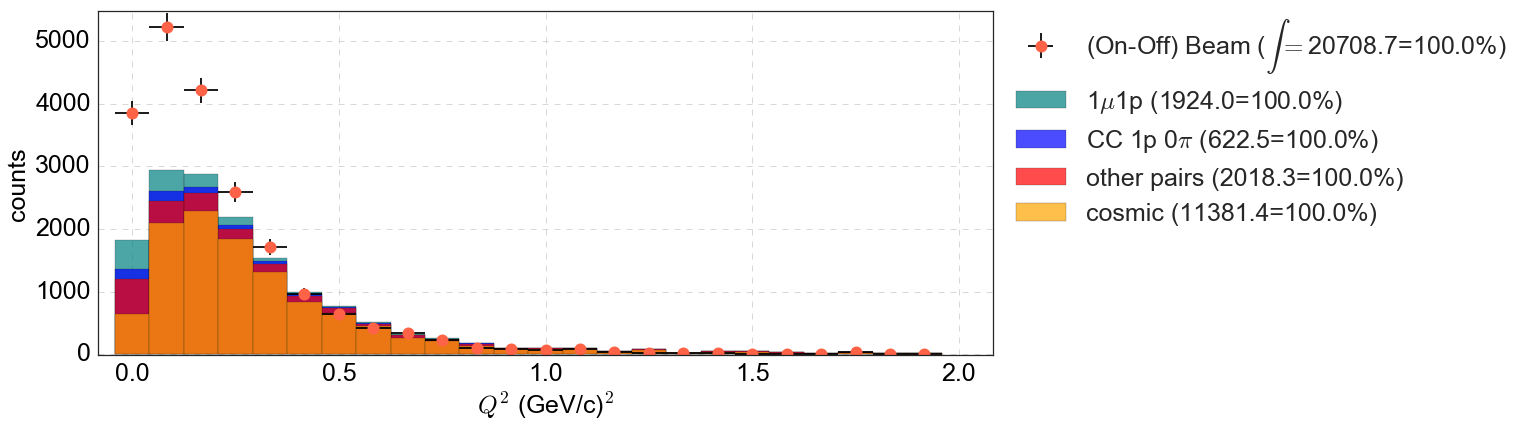

In [8]:
ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam['no cut']                         
                               ,OffBeamSample=reduced_OffBeam['no cut'] 
                               ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut']                               
                               ,var='reco_Q2' , x_label=r'$Q^2$ (GeV/c)$^2$' ,bins=np.linspace(0,2,25)
                               ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
                               ,legend_loc='bbox'
                               ,OriginalOnBeamSample=OnBeamFV,OriginalOffBeamSample=OffBeamFV)

In [2]:
M = 0.939 # GeV
m = 0.1056 # GeV
m_W = 80.42 # GeV # +/- 0.06
g_A = 1.267 # +/- 0.004
cos_theta_C = 0.9755 # +/- 0.004
G_F = 1.1663787 # GeV**-2 # +/- 0.0000006
mu_p = 2.7928474 # proton dipole moment
mu_n = -1.913 # neutron dipole moment

In [3]:
M2 = M * M
m2 = m * m
def tau( Q2 = 0.0 ):
    return (Q2 / (4.*M2))
def G_d( Q2 = 0.0 , Lambda2 = 0.71 ):    
    return np.power((1. + Q2/Lambda2),-2)

def G_A_dipole( Q2 = 0.0 ):    
    return np.power((1. + Q2/np.square(M_A)),-2)

def G_E_n_Bradford( Q2 = 0.0 ):
    
    a = np.array([0 , 1.25 , 1.30 ])
    a_err = np.array([0 , 0.368 , 1.99 ])
    
    b = np.array([ 0 , -9.86 , 305 , -758 , 802])
    b_err = np.array([ 0 , 6.46 , 28.6 , 77.5 , 156])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1)) + a[2]*(np.power(tau(Q2),2))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3)) + b[4]*(np.power(tau(Q2),4))


    return (numerator/denominator)

def G_E_p_Bradford( Q2 = 0.0 ):
    
    a = np.array([1. , -0.0578 ])
    a_err = np.array([0 , 0.166 ])
    
    b = np.array([ 0 , 11.1 , 13.6 , 33.0])
    b_err = np.array([ 0 , 0.217 , 1.39 , 8.95])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return (numerator/denominator)

def G_E_Bradford( Q2 = 0.0 ):
    return 0.5*( G_E_p_Bradford(Q2) - G_E_n_Bradford(Q2) )

def G_M_n_Bradford( Q2 = 0.0 ):

    # Bradford gives G_M_n/mu_n in their paper
    a = np.array([ 1 , 1.81 ])
    a_err = np.array([ 0 , 0.402 ])
    
    b = np.array([ 0 , 14.1 , 20.7 , 68.7])
    b_err = np.array([ 0 , 0.597 , 2.55 , 14.1])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_n*(numerator/denominator)

def G_M_p_Bradford( Q2 = 0.0 ):
    a = np.array([ 1 , 0.150 ])
    a_err = np.array([ 0 , 0.0312 ])
    
    b = np.array([ 0 , 11.1 , 19.6 , 7.54])
    b_err = np.array([ 0 , 0.103 , 0.281 , 0.967])

    numerator = a[0]*(np.power(tau(Q2),0)) + a[1]*(np.power(tau(Q2),1))
    denominator = 1.0 + b[1]*(np.power(tau(Q2),1)) + b[2]*(np.power(tau(Q2),2)) + b[3]*(np.power(tau(Q2),3))

    return mu_p*(numerator/denominator)

def G_M_Bradford( Q2 = 0.0 ):
    return 0.5*( G_M_p_Bradford(Q2) - G_M_n_Bradford(Q2) )

def F1_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_p_Bradford(Q2) + G_E_p_Bradford(Q2) )
def F2_p_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_p_Bradford(Q2) - G_E_p_Bradford(Q2) )
def F1_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_n_Bradford(Q2) + G_E_n_Bradford(Q2) )
def F2_n_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_n_Bradford(Q2) - G_E_n_Bradford(Q2) )


def F1V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( tau(Q2)*G_M_Bradford(Q2) + G_E_Bradford(Q2) )
def F2V_Bradford( Q2 = 0.0 ):
    return (1./(1.0+tau(Q2))) * ( G_M_Bradford(Q2) - G_E_Bradford(Q2) )

def G_E_p_Bernauer( Q2 = 0.0 ):
    a = np.array([ 1.0 , -3.3686, 14.5606 , -88.1912 
                  , 453.6244 , -1638.7911 , 3980.7174 
                  , -6312.6333 , 6222.3646 , -3443.2251 
                  , 814.4112 ])
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3) + a[4]*np.power(Q2,4) + a[5]*np.power(Q2,5)
def G_M_p_Bernauer( Q2 = 0.0 ):
    a = np.array([1.0 ,-2.5952 , 1.0222 , 23.4945, -93.0372
                  ,140.7984, -0.3656 , -305.6759 , 444.6251 
                  , -273.6688 , 64.5811 ])
    a = np.array([ 1.0 ,-2.5952])
    return  a[0]*(Q2**0) + a[1]*np.power(Q2,1) + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3)
    Q2_powers = np.array([np.power(Q2,n) for n in range(len(a))])

In [4]:
G_F2 = G_F * G_F
cos2_theta_C = cos_theta_C*cos_theta_C
m_W2 = m_W * m_W

# Kinematical Factor
def KinFactor( E=0 , Q2=0.0):
    F = (M2*G_F2*cos2_theta_C)/(8*np.pi)
    #     return ( F/np.square(E) ) * np.square( m_W2/(m_W2+Q2) )  # F is just a Fermi-factor, independent for the experiment
    return ( 1./np.square(E) ) * np.square( m_W2/(m_W2+Q2) ) 


# ξ
def xi( E=0 , Q2=0.0 ):
    return ( (4*M*E - Q2 - m2)/(M2))


# A
def A( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    G_E_V = G_E_Bradford(Q2)
    G_M_V = G_M_Bradford(Q2)
    I = np.ones(len(t))
    return (4.*t*( (1+t)*np.square(G_A) - 4*np.square(G_E_V) + 4*t*np.square(G_M_V) ))
# The last two terms in A are usually discarded in experimental analyses as they are suppressed by powers of (m/M)2 ∼ 1% 


# B
def B( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    G_M_V = G_M_Bradford(Q2)
    return (8 * t * G_A * G_M_V)


# C
def C( Q2=0.0 ):
    t = tau(Q2)
    G_A = G_A_dipole(Q2)
    F_1_V = F1V_Bradford(Q2)
    F_2_V = F2V_Bradford(Q2)
    return ( 0.25*np.square(G_A) + np.square(F_1_V) + t*np.square(F_2_V) )

In [5]:
def CCelasticXsec(E=0,Q2=0.0):
    return (KinFactor(E , Q2) * ( A(Q2) + xi(E,Q2)*B(Q2) + np.square(xi(E,Q2))*C(Q2) ))

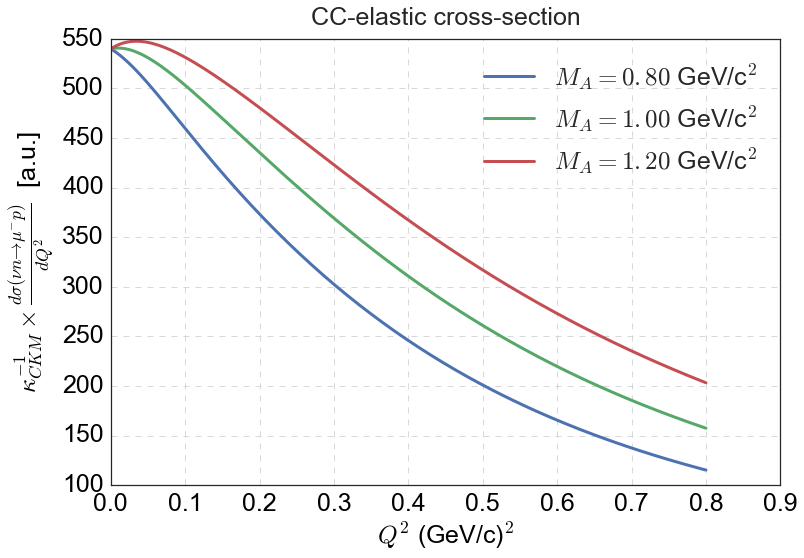

In [11]:
Q2 = np.linspace( 0.0 , 0.8 , 200 )
E = 0.7#np.random.normal( 0.7 , 0.02 , 200 )

fig,ax=plt.subplots(figsize=(12,8))
for axial_mass in np.linspace(0.8,1.2,3):
    M_A = axial_mass
    plt.plot( Q2 , 60*CCelasticXsec(E=E,Q2=Q2) , label='$M_A=%.2f$ GeV/c$^2$'%M_A,linewidth=3)
plt.legend( loc='upper right', fontsize=25 )
set_axes(ax,r'$Q^2$ (GeV/c)$^2$','$\\kappa_{CKM}^{-1}\\times\\frac{d\\sigma (\\nu n \\to \\mu^{-} p) }{dQ^2} $  [a.u.]'
         ,title='CC-elastic cross-section',do_add_grid=True)

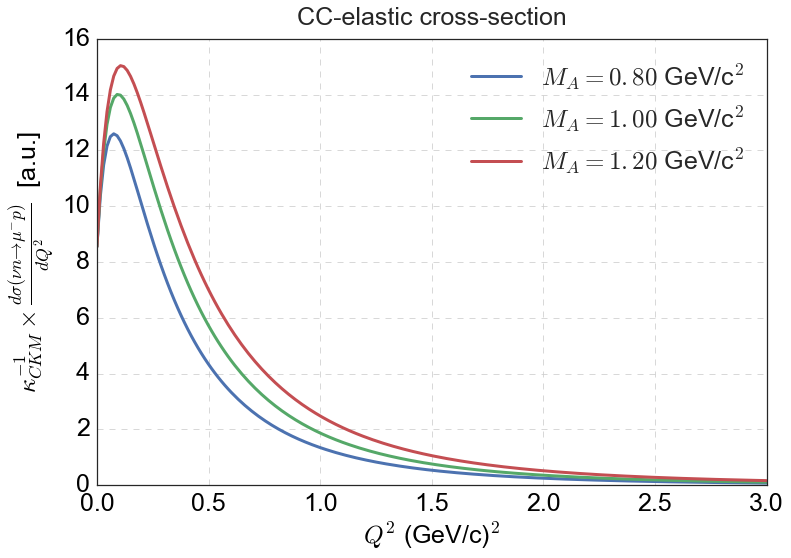

In [51]:
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Q2 = np.linspace( 0.0 , 3 , 200 )
E = np.linspace( 0.1 , 2 , 200 )
# X,Y = np.meshgrid(Q2,E)
# XX = X.flatten()
# YY = Y.flatten()
# A = np.c_[np.ones(len(Q2),len(E)), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
# C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
# Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)


fig,ax=plt.subplots(figsize=(12,8))
for axial_mass in np.linspace(0.8,1.2,3):
    M_A = axial_mass
    plt.plot( Q2 , CCelasticXsec(E=E,Q2=Q2) , label='$M_A=%.2f$ GeV/c$^2$'%M_A,linewidth=3)
plt.legend( loc='upper right', fontsize=25 )
set_axes(ax,r'$Q^2$ (GeV/c)$^2$','$\\kappa_{CKM}^{-1}\\times\\frac{d\\sigma (\\nu n \\to \\mu^{-} p) }{dQ^2} $  [a.u.]'
         ,title='CC-elastic cross-section',do_add_grid=True)

NameError: name 'PcmX' is not defined

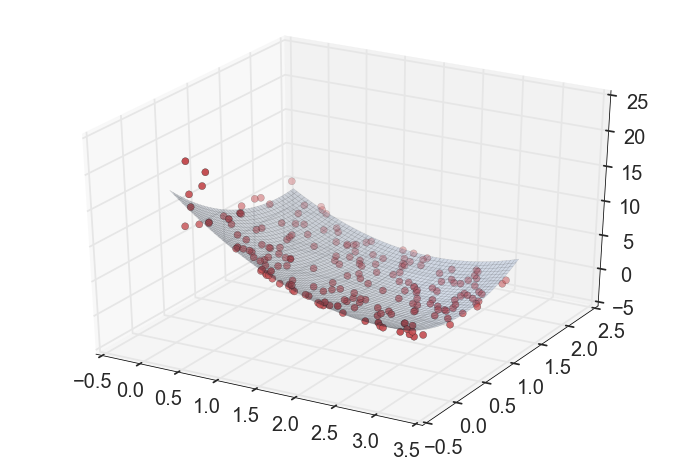

In [67]:
# some 3-dim points
# mean = np.array([0.0,0.0,0.0])
# cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
N = 200
# data = np.random.multivariate_normal(mean, cov, N)
# print data
# X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
Q2 = np.random.uniform( 0.0 , 3 , N )
Q2_ = np.array([q2 for q2 in Q2])
E = np.random.uniform( 0.1 , 2 , N )
E_ = np.array([e for e in E])
sigma = CCelasticXsec(E=E_,Q2=Q2_)
sigma_ = np.array([s for s in sigma])
data = np.vstack((Q2_,E_,sigma_)).T 
# print data
X,Y = np.meshgrid(np.arange(0, 3, 0.05), np.arange(0, 2, 0.05))
XX = X.flatten()
YY = Y.flatten()
A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
# plt.xlabel('X')
# plt.ylabel('Y')
# ax.set_zlabel('Z')
# ax.axis('equal')
# ax.axis('tight')

In [14]:
bins=np.linspace(0,2,25)

Q2distributions = dict()
Q2distributions['MC'] = np.histogram(reduced_MCbnbDATAcosmicSamples['no cut']['reco_Q2'],bins=bins)
Q2distributions['BeamOn'] = np.histogram(reduced_OnBeam['no cut']['reco_Q2'],bins=bins)
Q2distributions['BeamOff'] = np.histogram(reduced_OffBeam['no cut']['reco_Q2'],bins=bins)
Q2distributions['On-Off beam'] = Q2distributions['BeamOn'] - OffBeam_scaling*Q2distributions['BeamOff']
Q2distributions['On-Off beam err'] = Q2distributions['BeamOn'] - OffBeam_scaling*Q2distributions['BeamOff']

#     h_OnBeam_minus_OffBeam_err = np.sqrt( np.square(h_OnBeam_err) + np.square(OffBeam_scaling*h_OffBeam_err)  )




# ax,leg=OnBeam_minus_OffBeam_1d(OnBeamSample=reduced_OnBeam['no cut']
#                                ,OffBeamSample=reduced_OffBeam['no cut']
#                                ,MCsamples=reduced_MCbnbDATAcosmicSamples['no cut']
#                                ,MCbnbDATAcosmicSamples=MCbnbDATAcosmicSamples
#                                ,var='reco_Q2' , x_label=r'$Q^2$ (GeV/c)$^2$' ,bins=np.linspace(0,2,25)
#                                ,legend_loc='bbox')

KeyError: 'reco_Q2'